In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_filename = "train.csv"
test_filename = "test.csv"

## df.info(): show data types

In [4]:
train_data = pd.read_csv(train_filename)
print("train_data.shape", train_data.shape)
print("train_data.info")
print(train_data.info())
train_data.head()

train_data.shape (414, 8)
train_data.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


## df.nunique(): show unique values

In [5]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']


id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64

## df.isnull(): show if there are any null-values

In [6]:
print(train_data.isnull().sum())

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


## checking for duplicate values

In [7]:
duplicate = train_data[train_data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, gravity, ph, osmo, cond, urea, calc, target]
Index: []


## show (min, max values)

In [8]:
print(train_data.min().T)
print(train_data.max().T)

id           0.000
gravity      1.005
ph           4.760
osmo       187.000
cond         5.100
urea        10.000
calc         0.170
target       0.000
dtype: float64
id          413.00
gravity       1.04
ph            7.94
osmo       1236.00
cond         38.00
urea        620.00
calc         14.34
target        1.00
dtype: float64


## data cleaning for 'id'

In [9]:
drop_col = ['id']
train_data.drop(drop_col, axis=1, inplace=True)
train_data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


# Exploratory Data Analysis (EDA)

## Correlation Heatmap of Dataset

In [10]:
corr_matrix = train_data.corr()
corr_matrix

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


In [11]:
def correlation_headtmap(df):
    _, ax = plt.subplots(figsize = (14, 12))
    
    _ = sns.heatmap(df.corr(), cmap = "RdBu_r", square=True, annot=True, ax=ax, vmax=1., vmin=-1.)
    

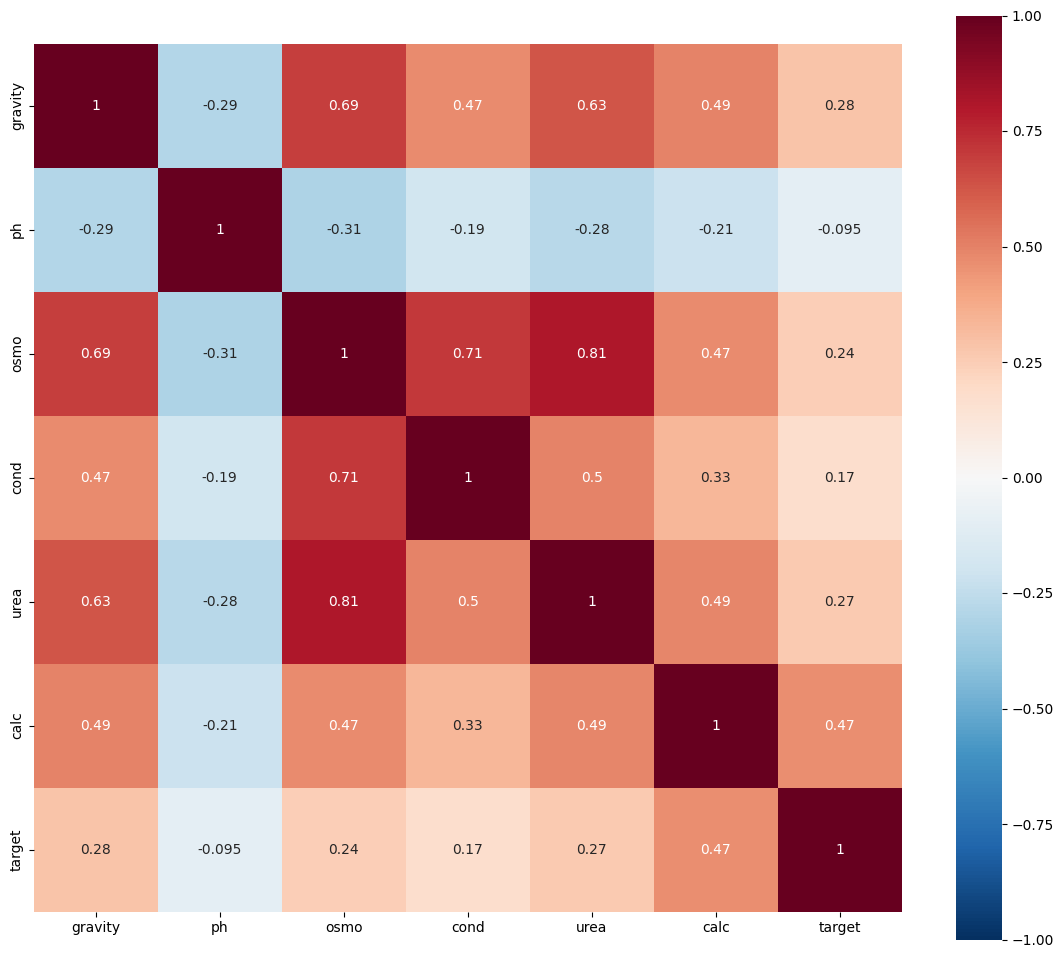

In [12]:
correlation_headtmap(train_data)

Correlation coefficient:\
0.7~ 0.9 highly correlated\
0.5~ 0.7 moderately correlated

## Pair Plots
Used for Identify patterns, Detect outliers, Assess correlation, Explore data distributions


In [13]:
def pair_plots(df, target):
    plt.figure(figsize =(12, 10))
    sns.pairplot(df, hue=target)
    plt.legend(target)
    plt.tight_layout()
    plt.plot()
    

<Figure size 1200x1000 with 0 Axes>

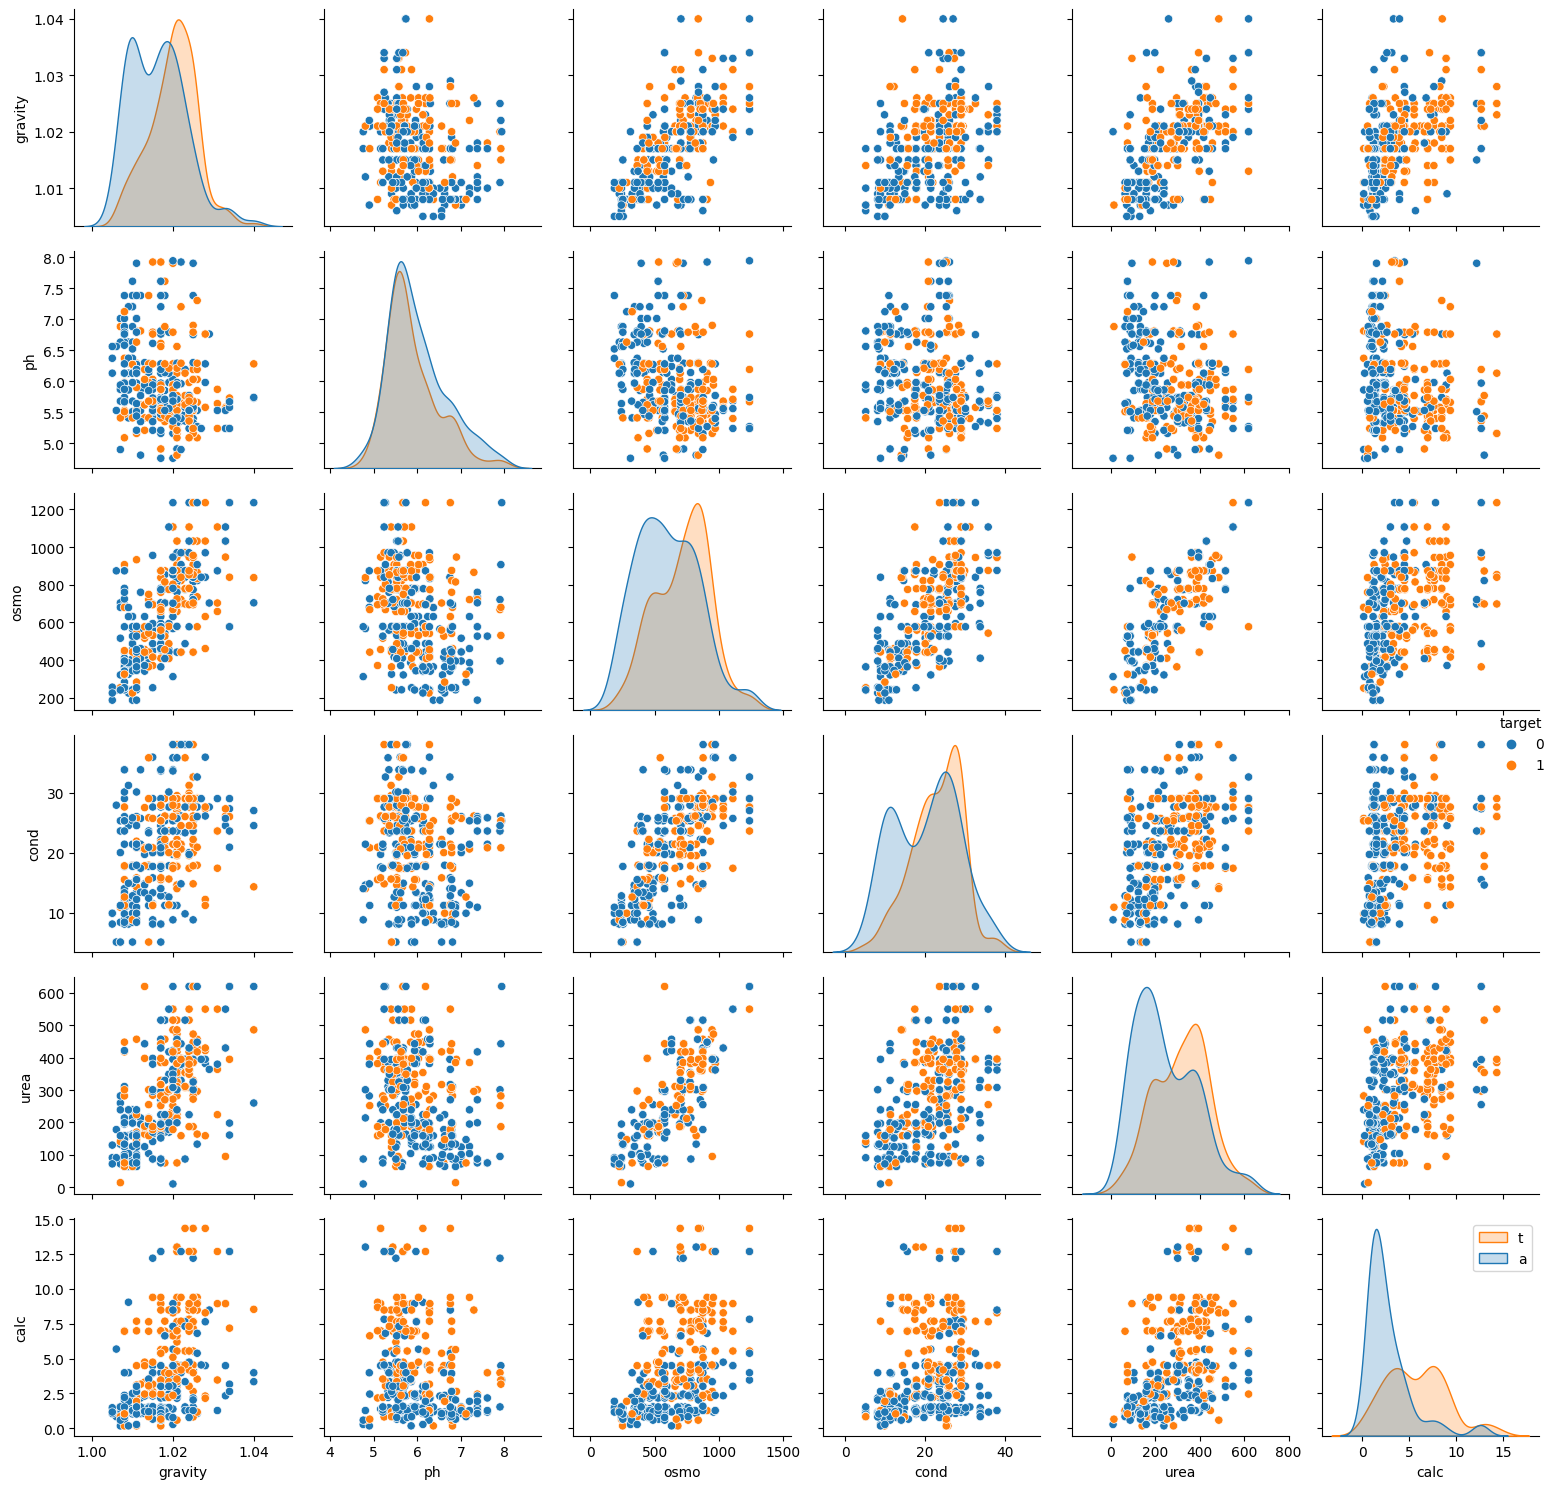

In [14]:
pair_plots(train_data, "target")

## Distribution of Data (Histograms)
Looking for Skewness\
\>0.5 (Highly/Positively Skewed, this is reflected on the distribution graph with the values towards the left of the graph)


In [15]:
train_data.skew().sort_values(ascending=False)

calc       1.118533
ph         0.971308
urea       0.329107
gravity    0.291010
target     0.224421
osmo       0.147395
cond      -0.212009
dtype: float64

In [16]:
def data_distribution(df):
    plt.figure(figsize=(14, 10))
    for i, col in enumerate(df.columns, 1):
        plt.subplot(4,3,i)
        sns.histplot(df[col], kde=True)
        plt.tight_layout()
        plt.plot()

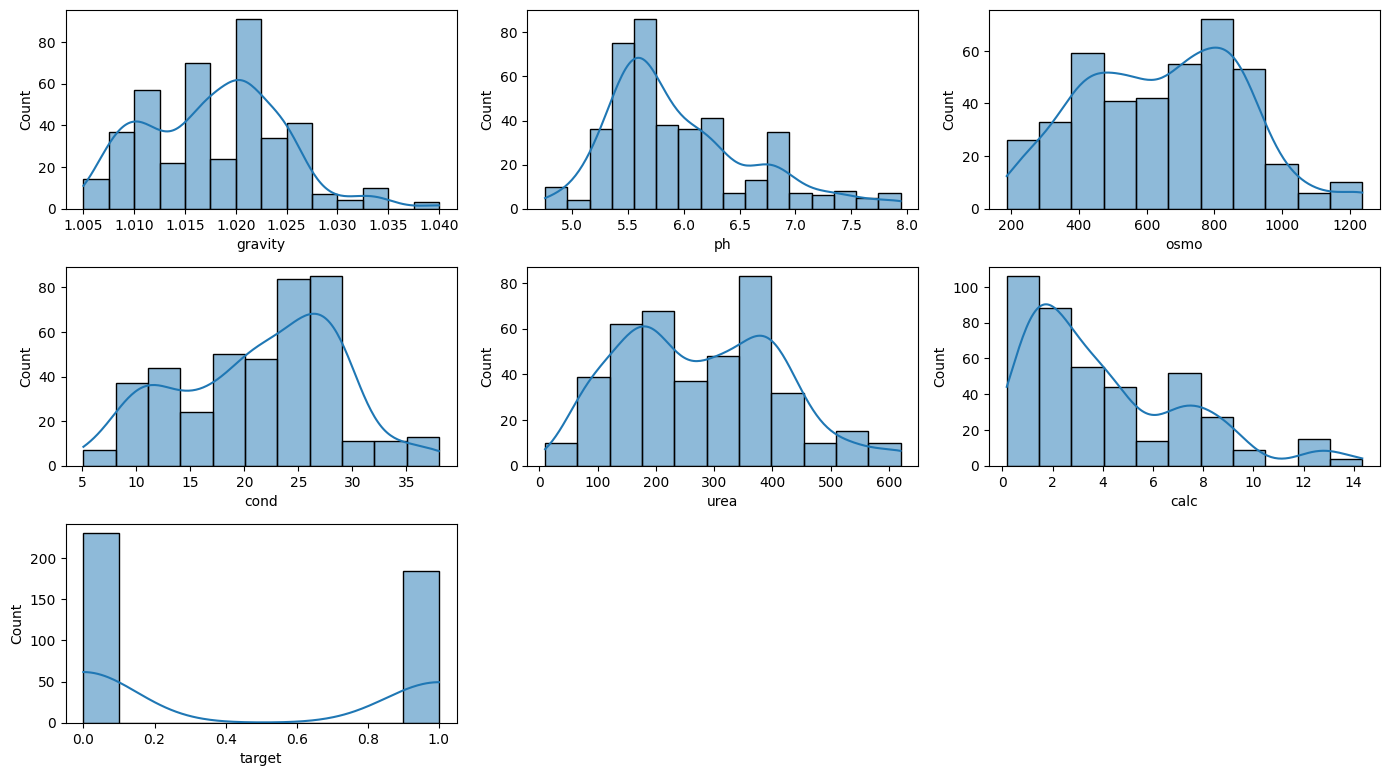

In [17]:
data_distribution(train_data)

## Box Plots
The first quartile (Q1) is greater than 25% of the data and less than the other 75%.\
The second quartile (Q2) sits in the middle, dividing the data in half. Q2 is also known as the median.\
The third quartile (Q3) is larger than 75% of the data, and smaller than the remaining 25%.\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html


In [22]:
def box_plots(df):
    plt.figure(figsize=[16, 12])
    for i, col in enumerate(df.columns, 1):
        plt.subplot(4, 3, i)
        # organge line: median
        # green dotted line: mean
        plt.boxplot(x=df[col], showmeans=True, meanline=True)
        plt.title(col)
        plt.ylabel('count')

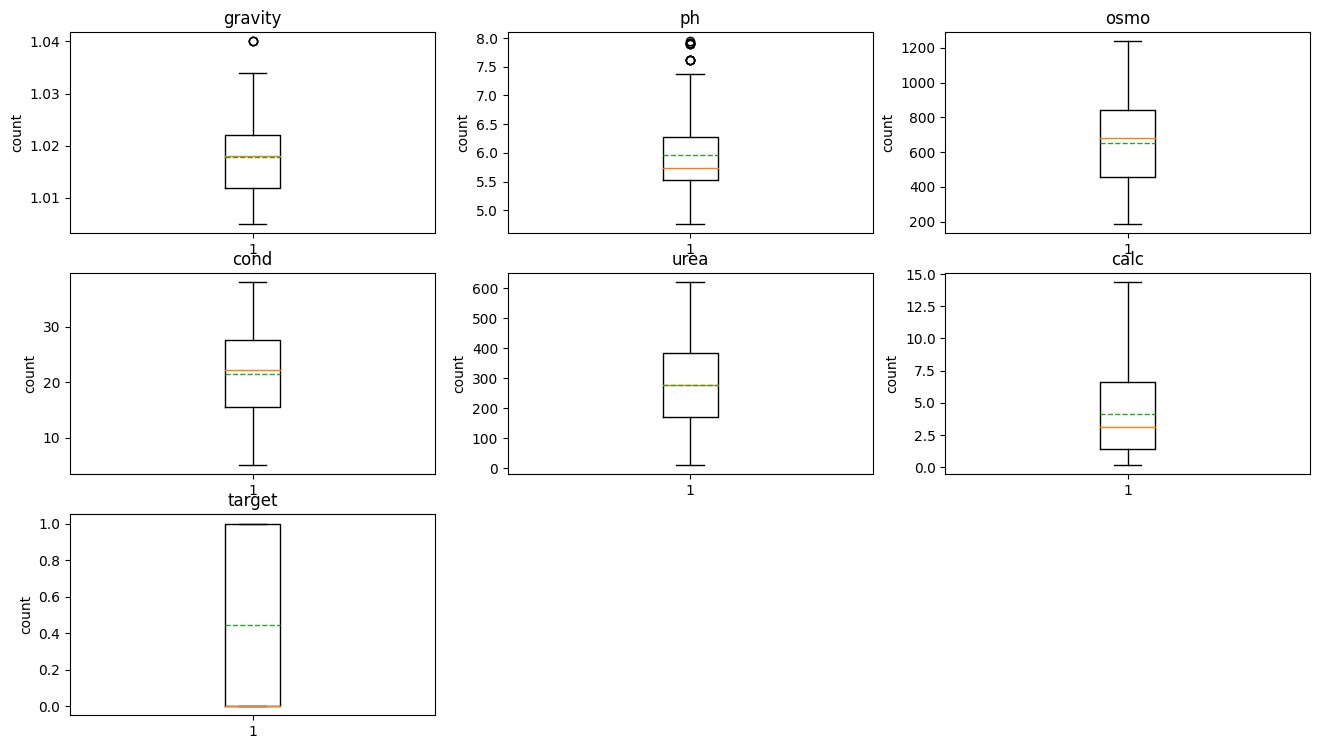

In [23]:
box_plots(train_data)